In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_csv('data.csv')

In [ ]:
df['Label'] = df['ngay_mo_date'].notna().astype(int)

In [25]:
value_counts = df['sdt_mahoa'].value_counts()
values_appearing_more_than_once = value_counts[value_counts > 1]
values_appearing_more_than_once = values_appearing_more_than_once.index.tolist()

filtered_df = df[df['sdt_mahoa'].isin(values_appearing_more_than_once)]

filtered_df = df.drop_duplicates(subset=['sdt_mahoa'])

In [ ]:
threshold = 0.8
columns_to_check = ['apru_1', 'apru_2', 'apru_3', 'apru_4', 'apru_5','data_1', 'data_2', 'data_3', 'data_4','data_5','call_1', 'call_2', 'call_3', 'call_4','call_5']
total_columns = len(columns_to_check)
threshold_value = threshold * total_columns 

def missing_value_count(row):
    return row[columns_to_check].isnull().sum()

filtered_df['missing_count'] = filtered_df.apply(missing_value_count, axis=1)

rows_above_threshold = filtered_df[filtered_df['missing_count'] > threshold_value]

rows_below_threshold = filtered_df[filtered_df['missing_count'] <= threshold_value]

rows_above_threshold = rows_above_threshold.drop(columns=['missing_count'])
rows_below_threshold = rows_below_threshold.drop(columns=['missing_count'])

dropped_samples = rows_above_threshold

remaining_samples = rows_below_threshold

final_df=remaining_samples.copy()

<ipython-input-53-f2a86debed6c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['missing_count'] = filtered_df.apply(missing_value_count, axis=1)


In [54]:
to_divide=['apru_1', 'apru_2', 'apru_3', 'apru_4', 'apru_5']
final_df[to_divide]=final_df[to_divide].div(1000)

In [ ]:
import pandas as pd

columns_to_cap = [
    'apru_1', 'apru_2', 'apru_3', 'apru_4', 'apru_5',
    'data_1', 'data_2', 'data_3', 'data_4','data_5',
    'call_1', 'call_2', 'call_3', 'call_4','call_5'
]

df_cleaned = final_df.copy()

for col in columns_to_cap:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned[col] = df_cleaned[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

print(df_cleaned.head())

                                  sdt_mahoa  ngay_khoa ngay_mo_date  \
0  69c7d14102cf29c396419d8f91b8392900efd43f  9/29/2021    10/2/2021   
1  aeceec94f9fea5256fba05cfc30fae9c8f591b18  9/29/2021          NaN   
2  c880badca6bf646c40484b76c2529560a489c33b  9/29/2021          NaN   
3  4f05d3351d501bd903abd4fcca378e9608d4189f  9/29/2021    10/2/2021   
4  ab4aed7cadbd793f7ca13ea343ee337b1ab49350  9/29/2021   10/14/2021   

   ngay_mo_khoa  ngay_nap_tien_gan_nhat    apru_1      apru_2      apru_3  \
0           3.0                     2.0    0.0000    0.000000         NaN   
1           NaN                     NaN    0.0000   41.666667   41.666667   
2           NaN                     NaN       NaN    0.000000         NaN   
3           3.0                     NaN  149.3503  149.000500  149.000500   
4          15.0                    14.0    0.0000    0.000000         NaN   

       apru_4      apru_5  ...     data_1    data_2     data_3     data_4  \
0         NaN    0.000000  ...   

In [ ]:
import pandas as pd
columns_to_fill = [
    'apru_1', 'apru_2', 'apru_3', 'apru_4', 'apru_5',
    'data_1', 'data_2', 'data_3', 'data_4','data_5',
    'call_1', 'call_2', 'call_3', 'call_4','call_5'
]

df_filled = df_cleaned.copy()

for col in columns_to_fill:
    median_value = df_filled[col].median() 
    df_filled[col].fillna(median_value, inplace=True)  

<ipython-input-56-756e5231146d>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_value, inplace=True)  # Fill missing values with the median


In [57]:
df_encoded = pd.get_dummies(df_filled, columns=['da_tung_dang_ky_goi'], drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split


columns_to_keep = ['sdt_mahoa','ngay_mo_khoa','ngay_nap_tien_gan_nhat'] 
df_with_info = df_encoded[columns_to_keep] 

data=df_encoded.drop(columns=['sdt_mahoa','ngay_khoa','ngay_mo_date','ngay_mo_khoa','danh_sach_goi_dang_ky','ngay_nap_tien_gan_nhat','ngay_goi_tong_dai_gan_nhat','ngay_dang_ky_goi_gan_nhat'])
X = data.drop('Label', axis=1) 
y = data['Label'] 


X_train, X_test, y_train, y_test, df_with_info_train, df_with_info_test = train_test_split(
    X, y, df_with_info, test_size=0.3, random_state=42
)





In [43]:
df_with_info_test

,sdt_mahoa,ngay_mo_khoa,ngay_nap_tien_gan_nhat
77649,995a52c1432f1f1acf6a6f4625139f4c975062b9,NaN,15.0
126585,b3b287689f5bedd1494952647675c0d191e47de0,7.0,15.0
186567,30d06d9c11b9c3cb1f6de51cf57897071ee180be,1.0,15.0
3717,5de2005ba3fff0752224f08f8cd55e2d443a041d,1.0,15.0
20786,55489726b02094734f8523772d4d36356428c4d0,NaN,15.0
...,...,...,...
146269,806f1e1e3caecbaedf2598a5e0104ce9226639f7,1.0,15.0
265548,785e5005d33bb5c9dc00f45f0288b69616d76806,1.0,15.0
223859,e6bf215c0f35e3feebb00f343cfcce8bfb0dbd8f,1.0,15.0
125280,290d78f9dea7713b307503b505996505754dc0d2,NaN,15.0


In [44]:
X_test

,apru_1,apru_2,apru_3,apru_4,apru_5,call_1,call_2,call_3,call_4,call_5,data_1,data_2,data_3,data_4,data_5,ngay_goi_tong_dai_gan_nhat,ngay_dang_ky_goi_gan_nhat,da_tung_dang_ky_goi_yes
77649,119.72840,138.049395,139.8562,198.82280,193.888200,10.0,22.0,55.0,88.0,121.0,0.000017,0.000036,0.000194,0.000032,0.000033,8.0,6862.0,False
126585,120.00010,0.000000,0.0000,120.64030,124.166667,21.0,0.0,0.0,42.0,54.0,0.035445,0.000000,0.000000,0.718382,1.054648,31.0,6862.0,False
186567,31.50005,78.499990,10.0000,86.17949,67.152300,2.0,0.0,3.0,7.0,9.0,0.000000,0.000000,0.000000,0.000232,0.133295,31.0,234.0,True
3717,73.30840,72.004295,71.8773,74.39850,73.330400,46.0,18.0,30.0,24.0,27.0,0.000000,0.000000,0.000000,0.000000,0.000000,31.0,6862.0,False
20786,120.00010,0.000000,110.6919,120.64030,11.787500,21.0,0.0,30.0,42.0,3.0,0.035445,0.000000,0.292847,0.718382,1.854292,31.0,6862.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146269,355.84340,355.175600,347.4482,358.99160,360.441400,74.0,99.0,32.0,84.0,96.0,8.023111,8.708707,4.754101,2.655576,7.049843,31.0,596.0,True
265548,129.00030,129.000300,131.2575,134.16040,135.054700,97.0,83.0,157.0,134.0,127.0,0.000354,0.133617,0.528888,0.558221,0.396570,31.0,935.0,True
223859,177.49160,160.766500,159.1447,162.74500,155.852400,60.0,89.0,77.0,57.0,92.0,2.761044,1.644436,3.136062,1.921728,4.695287,31.0,726.0,True
125280,120.00010,0.000000,50.0000,50.09200,51.489000,21.0,0.0,0.0,0.0,1.0,0.035445,0.000000,0.000000,1.564590,19.448017,31.0,433.0,True


In [11]:
# data=df_encoded.drop(columns=['sdt_mahoa','ngay_khoa','ngay_mo_date','ngay_mo_khoa','danh_sach_goi_dang_ky','ngay_nap_tien_gan_nhat'])

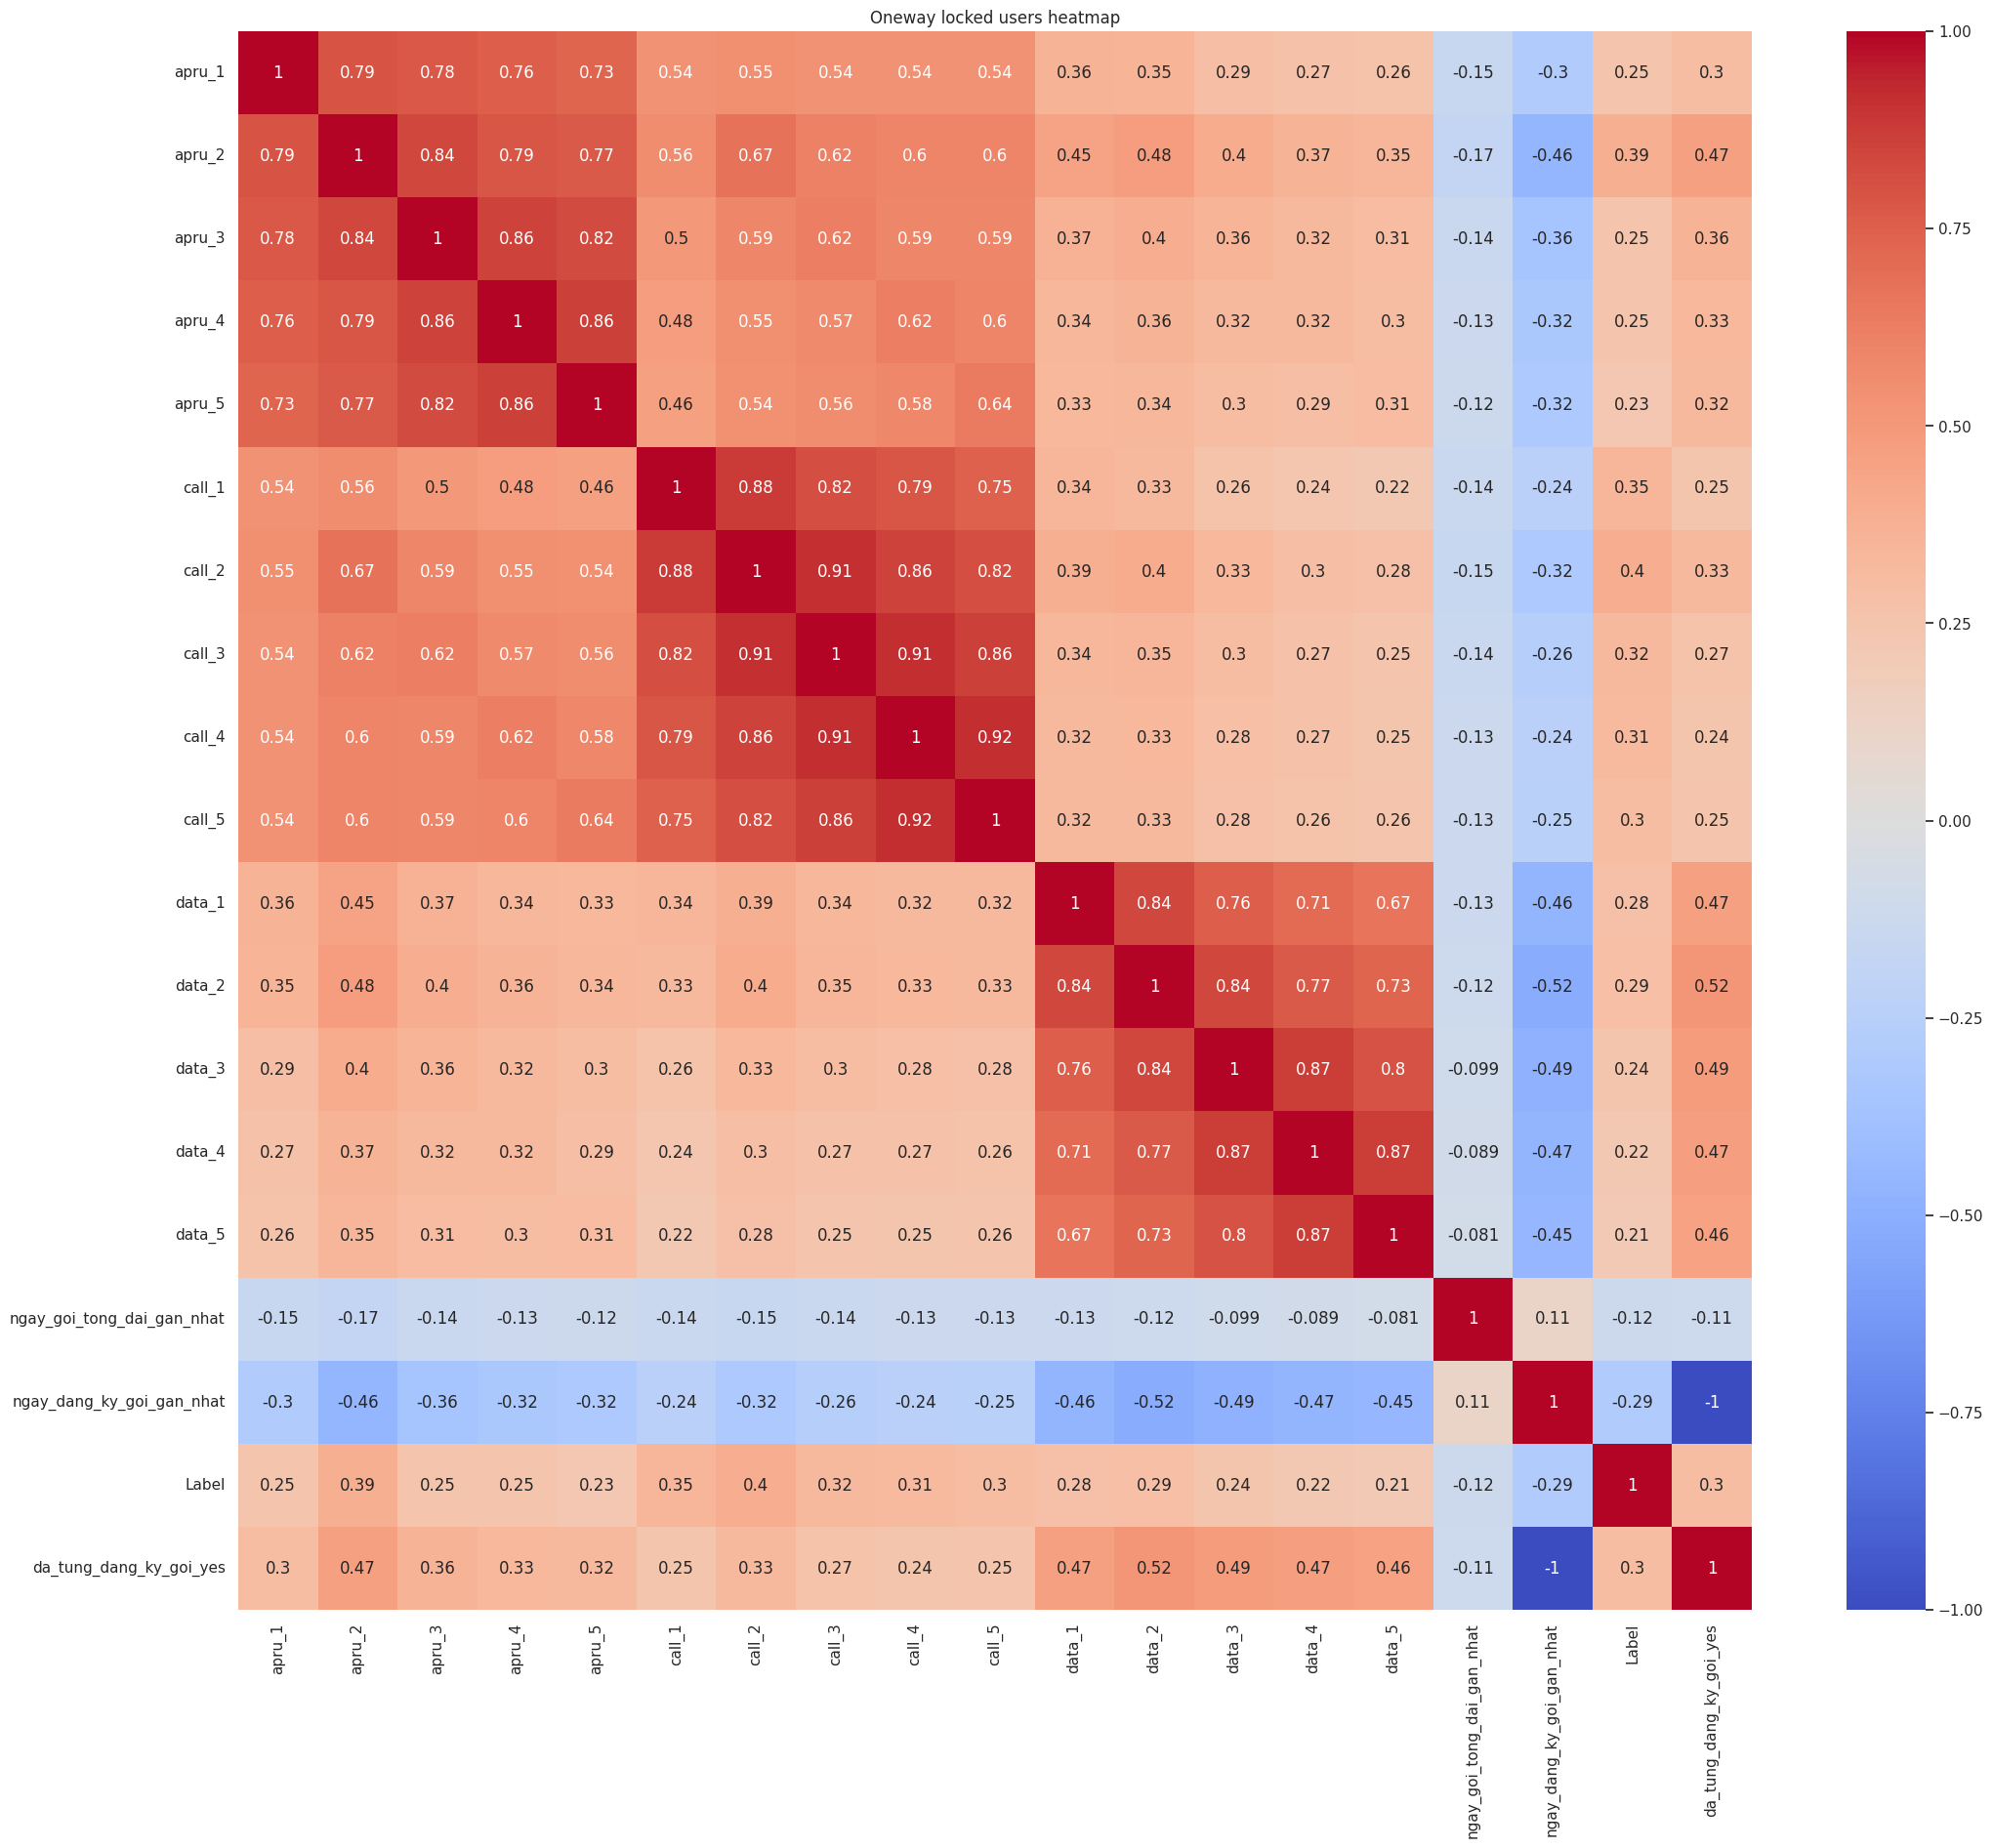

In [ ]:
corr_matrix = data.corr()
sns.set(style="white")
plt.figure(figsize=(25, 21))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Oneway locked users heatmap")
plt.show()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  roc_auc_score, confusion_matrix
from sklearn.pipeline import make_pipeline


In [ ]:
X = data.drop('Label', axis=1)  # Features
y = data['Label']  # Target label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_predictions_prob = rf_model.predict_proba(X_test)[:, 1]

In [ ]:

def evaluate_model(model_name, y_true, y_pred):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}\n")


evaluate_model('Random Forest', y_test, rf_predictions)

# evaluate_model('XGBoost', y_test, xgb_predictions)


Evaluation Metrics for Random Forest:
Accuracy: 0.7940
Precision: 0.8037
Recall: 0.8789
F1-Score: 0.8396
ROC-AUC: 0.7690
Confusion Matrix:
[[25275 13074]
 [ 7377 53532]]



## Tunning

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# rf_param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# rf = RandomForestClassifier()

# rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid,
#                               cv=3, n_jobs=-1, verbose=2, scoring='f1')

# rf_grid_search.fit(X_train, y_train)

# print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")
# rf_predictions = rf_grid_search.predict(X_test)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:

# evaluate_model('Random Forest', y_test, rf_predictions)

# # evaluate_model('XGBoost', y_test, xgb_predictions)

Evaluation Metrics for Random Forest:
Accuracy: 0.8013
Precision: 0.8073
Recall: 0.8882
F1-Score: 0.8458
ROC-AUC: 0.7757
Confusion Matrix:
[[25435 12914]
 [ 6809 54100]]



## Error Analyse 2

In [ ]:
# X_test_with_predictions = X_test.copy()

# X_test_with_predictions['sdt_mahoa'] = df_encoded.loc[X_test.index, 'sdt_mahoa']
# X_test_with_predictions['ngay_mo_khoa'] = df_encoded.loc[X_test.index, 'ngay_mo_khoa']
# X_test_with_predictions['ngay_nap_tien_gan_nhat'] = df_encoded.loc[X_test.index, 'ngay_nap_tien_gan_nhat']

# test_unlocked_pay = original_df.loc[original_test_index]
# X_test_recovered = X_test.copy()  # Keep the features used in testing
# X_test_recovered[['sdt_mahoa','ngay_mo_khoa', 'ngay_nap_tien_gan_nhat']] = test_unlocked_pay  
X_test_recovered = X_test.copy()  
X_test_recovered[['sdt_mahoa','ngay_mo_khoa', 'ngay_nap_tien_gan_nhat']] = df_with_info_test  



In [102]:
rf_predictions_prob

array([0.66      , 0.56470266, 0.52      , ..., 0.95      , 0.53      ,
       0.0825057 ])

In [ ]:

X_test_recovered['predictions'] =  rf_predictions
X_test_recovered['pred_prob'] =  rf_predictions_prob


In [104]:
X_test_recovered

,apru_1,apru_2,apru_3,apru_4,apru_5,call_1,call_2,call_3,call_4,call_5,...,data_2,data_3,data_4,data_5,da_tung_dang_ky_goi_yes,sdt_mahoa,ngay_mo_khoa,ngay_nap_tien_gan_nhat,predictions,pred_prob
77649,119.72840,138.049395,139.8562,198.82280,193.888200,10.0,22.0,55.0,88.0,121.0,...,0.000036,0.000194,0.000032,0.000033,False,995a52c1432f1f1acf6a6f4625139f4c975062b9,NaN,NaN,1,0.660000
126585,120.00010,0.000000,0.0000,120.64030,124.166667,21.0,0.0,0.0,42.0,54.0,...,0.000000,0.000000,0.718382,1.054648,False,b3b287689f5bedd1494952647675c0d191e47de0,7.0,NaN,1,0.564703
186567,31.50005,78.499990,10.0000,86.17949,67.152300,2.0,0.0,3.0,7.0,9.0,...,0.000000,0.000000,0.000232,0.133295,True,30d06d9c11b9c3cb1f6de51cf57897071ee180be,1.0,NaN,1,0.520000
3717,73.30840,72.004295,71.8773,74.39850,73.330400,46.0,18.0,30.0,24.0,27.0,...,0.000000,0.000000,0.000000,0.000000,False,5de2005ba3fff0752224f08f8cd55e2d443a041d,1.0,NaN,1,0.770000
20786,120.00010,0.000000,110.6919,120.64030,11.787500,21.0,0.0,30.0,42.0,3.0,...,0.000000,0.292847,0.718382,1.854292,False,55489726b02094734f8523772d4d36356428c4d0,NaN,NaN,0,0.030813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146269,355.84340,355.175600,347.4482,358.99160,360.441400,74.0,99.0,32.0,84.0,96.0,...,8.708707,4.754101,2.655576,7.049843,True,806f1e1e3caecbaedf2598a5e0104ce9226639f7,1.0,NaN,1,0.880000
265548,129.00030,129.000300,131.2575,134.16040,135.054700,97.0,83.0,157.0,134.0,127.0,...,0.133617,0.528888,0.558221,0.396570,True,785e5005d33bb5c9dc00f45f0288b69616d76806,1.0,NaN,1,0.930000
223859,177.49160,160.766500,159.1447,162.74500,155.852400,60.0,89.0,77.0,57.0,92.0,...,1.644436,3.136062,1.921728,4.695287,True,e6bf215c0f35e3feebb00f343cfcce8bfb0dbd8f,1.0,NaN,1,0.950000
125280,120.00010,0.000000,50.0000,50.09200,51.489000,21.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,1.564590,19.448017,True,290d78f9dea7713b307503b505996505754dc0d2,NaN,NaN,1,0.530000


In [83]:
group_1 = final_df[(final_df['ngay_mo_khoa'] >= final_df['ngay_nap_tien_gan_nhat'] + 1)]
group_2 = final_df[(final_df['ngay_nap_tien_gan_nhat'].isna()) & (final_df['ngay_mo_khoa'].notna())]
group_3 = final_df[(final_df['ngay_nap_tien_gan_nhat'].notna()) & (final_df['ngay_mo_khoa'].isna())]
group_4 = final_df[(final_df['ngay_mo_khoa'] < final_df['ngay_nap_tien_gan_nhat'])]
group_5 = final_df[(final_df['ngay_mo_khoa'].isna()) & (final_df['ngay_nap_tien_gan_nhat'].isna())]


count_1 = group_1.shape[0]
count_2 = group_2.shape[0]
count_3 = group_3.shape[0]
count_4 = group_4.shape[0]
count_5 = group_5.shape[0]


print(f"Group 1 (nếu ngày mở khóa >= ngày nạp+1): {count_1}")
print(f"Group 2 (nếu ko ghi nhận ngày nạp tiền mà thuê bao có ngày mở): {count_2}")
print(f"Group 3 (nếu ghi nhận ngày nạp nhưng ko có ngày mở): {count_3}")
print(f"Group 4 (nếu ngày mở khóa< ngày nạp tiền gần nhất): {count_4}")
print(f"Group 5 (không ngày mở, không ngày nạp): {count_5}")

Group 1 (nếu ngày mở khóa >= ngày nạp+1): 15392
Group 2 (nếu ko ghi nhận ngày nạp tiền mà thuê bao có ngày mở): 184325
Group 3 (nếu ghi nhận ngày nạp nhưng ko có ngày mở): 2302
Group 4 (nếu ngày mở khóa< ngày nạp tiền gần nhất): 2771
Group 5 (không ngày mở, không ngày nạp): 125188


In [120]:
group_1_df = df_encoded[(df_encoded['ngay_mo_khoa'] >= df_encoded['ngay_nap_tien_gan_nhat'] + 1)]
group_2_df = df_encoded[(df_encoded['ngay_nap_tien_gan_nhat'].isna()) & (df_encoded['ngay_mo_khoa'].notna())]
group_3_df = df_encoded[(df_encoded['ngay_nap_tien_gan_nhat'].notna()) & (df_encoded['ngay_mo_khoa'].isna())]
group_4_df = df_encoded[(df_encoded['ngay_mo_khoa'] < df_encoded['ngay_nap_tien_gan_nhat'])]
group_5_df = df_encoded[(df_encoded['ngay_mo_khoa'].isna()) & (df_encoded['ngay_nap_tien_gan_nhat'].isna())]


count_1 = group_1_df.shape[0]
count_2 = group_2_df.shape[0]
count_3 = group_3_df.shape[0]
count_4 = group_4_df.shape[0]
count_5 = group_5_df.shape[0]


print(f"Group 1 (nếu ngày mở khóa >= ngày nạp+1): {count_1}")
print(f"Group 2 (nếu ko ghi nhận ngày nạp tiền mà thuê bao có ngày mở): {count_2}")
print(f"Group 3 (nếu ghi nhận ngày nạp nhưng ko có ngày mở): {count_3}")
print(f"Group 4 (nếu ngày mở khóa< ngày nạp tiền gần nhất): {count_4}")
print(f"Group 5 (không ngày mở, không ngày nạp): {count_5}")

Group 1 (nếu ngày mở khóa >= ngày nạp+1): 15392
Group 2 (nếu ko ghi nhận ngày nạp tiền mà thuê bao có ngày mở): 184325
Group 3 (nếu ghi nhận ngày nạp nhưng ko có ngày mở): 2302
Group 4 (nếu ngày mở khóa< ngày nạp tiền gần nhất): 2771
Group 5 (không ngày mở, không ngày nạp): 125188


In [106]:
group_1 = X_test_recovered[(X_test_recovered['ngay_mo_khoa'] >= X_test_recovered['ngay_nap_tien_gan_nhat'] + 1)]
group_2 = X_test_recovered[(X_test_recovered['ngay_nap_tien_gan_nhat'].isna()) & (X_test_recovered['ngay_mo_khoa'].notna())]
group_3 = X_test_recovered[(X_test_recovered['ngay_nap_tien_gan_nhat'].notna()) & (X_test_recovered['ngay_mo_khoa'].isna())]
group_4 = X_test_recovered[(X_test_recovered['ngay_mo_khoa'] < X_test_recovered['ngay_nap_tien_gan_nhat'])]
group_5 = X_test_recovered[(X_test_recovered['ngay_mo_khoa'].isna()) & (X_test_recovered['ngay_nap_tien_gan_nhat'].isna())]


count_1 = group_1.shape[0]
count_2 = group_2.shape[0]
count_3 = group_3.shape[0]
count_4 = group_4.shape[0]
count_5 = group_5.shape[0]


print(f"Group 1 (nếu ngày mở khóa >= ngày nạp+1): {count_1}")
print(f"Group 2 (nếu ko ghi nhận ngày nạp tiền mà thuê bao có ngày mở): {count_2}")
print(f"Group 3 (nếu ghi nhận ngày nạp nhưng ko có ngày mở): {count_3}")
print(f"Group 4 (nếu ngày mở khóa< ngày nạp tiền gần nhất): {count_4}")
print(f"Group 5 (không ngày mở, không ngày nạp): {count_5}")

Group 1 (nếu ngày mở khóa >= ngày nạp+1): 4617
Group 2 (nếu ko ghi nhận ngày nạp tiền mà thuê bao có ngày mở): 55190
Group 3 (nếu ghi nhận ngày nạp nhưng ko có ngày mở): 713
Group 4 (nếu ngày mở khóa< ngày nạp tiền gần nhất): 820
Group 5 (không ngày mở, không ngày nạp): 37636


In [107]:
# Find indices of misclassified users where true label is 1 but predicted is 0
misclassified_indices = (y_test == 1) & (rf_predictions == 0)

# Extract the misclassified users
misclassified_users = group_1[misclassified_indices]

<ipython-input-107-9ce593bde69c>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  misclassified_users = group_1[misclassified_indices]


In [108]:
misclassified_users

,apru_1,apru_2,apru_3,apru_4,apru_5,call_1,call_2,call_3,call_4,call_5,...,data_2,data_3,data_4,data_5,da_tung_dang_ky_goi_yes,sdt_mahoa,ngay_mo_khoa,ngay_nap_tien_gan_nhat,predictions,pred_prob
190376,443.170887,75.558495,76.5468,86.7867,76.057300,39.0,26.0,78.0,71.0,29.0,...,0.000000,0.000000,0.000000,0.000000,False,a849b8426c4e6da4a60281d86fdc1ec629a60fde,6.0,5.0,0,0.490000
242285,120.000100,0.000000,110.6919,120.6403,124.166667,21.0,0.0,30.0,42.0,54.0,...,0.000000,0.292847,0.718382,1.054648,False,2feec8ed3c9d5994db83645dadc9f82f5bb2d3f5,9.0,8.0,0,0.082506
200065,0.000000,0.000000,0.0000,0.0000,124.166667,0.0,0.0,0.0,1.0,54.0,...,0.000000,0.000000,0.000000,1.054648,False,a40ce97a91099f3bc65fec0fae88e35ca113fd25,2.0,1.0,0,0.000000
51878,0.000000,0.193400,0.0000,0.0000,0.000000,0.0,2.0,1.0,4.0,2.0,...,9.369862,15.903491,17.792623,20.810004,True,0bb6495d1aea26aa5fcb636f90f6dfe9e19b256e,9.0,8.0,0,0.480000
27719,120.000100,0.000000,110.6919,120.6403,124.166667,21.0,0.0,30.0,42.0,54.0,...,0.000000,0.292847,0.718382,1.054648,False,e74ee92d8b7bc228454acb72d971c2bb7d0c9d9f,9.0,8.0,0,0.082506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73969,0.000000,0.000000,0.0000,0.0000,0.000000,0.0,6.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,False,ac6733bf1eb321000cc673cf5b80ac56ec081374,3.0,2.0,0,0.116085
56637,0.000000,6.704500,43.3090,0.0000,21.887000,4.0,5.0,1.0,3.0,16.0,...,0.000000,0.000000,0.000000,0.000000,False,0196de31c30314ca12f1d78e1d8c1ec78f7be1d5,4.0,3.0,0,0.490000
44375,0.000000,0.000000,110.6919,120.6403,124.166667,0.0,0.0,30.0,42.0,54.0,...,0.000000,0.292847,0.718382,1.054648,False,8701c6092f76d94918714d1123e2b59d5b1075b1,2.0,1.0,0,0.104070
48650,120.000100,0.000000,4.9136,39.7923,55.287000,21.0,2.0,1.0,1.0,14.0,...,0.000010,0.035875,1.070293,11.025535,True,4709bd66784526d26faa9238839da1e48a0efb98,3.0,2.0,0,0.490000


In [114]:
misclassified_users[(misclassified_users['pred_prob']< 0.5)&(misclassified_users['pred_prob']> 0.4)].describe()

,apru_1,apru_2,apru_3,apru_4,apru_5,call_1,call_2,call_3,call_4,call_5,data_1,data_2,data_3,data_4,data_5,ngay_mo_khoa,ngay_nap_tien_gan_nhat,predictions,pred_prob
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.0,559.000000
mean,28.262659,19.152475,39.626823,40.921905,50.373563,6.701252,8.040250,13.729875,15.489267,21.611807,0.433623,0.907785,1.783100,2.557703,3.183952,6.856887,5.838998,0.0,0.451976
std,59.268223,39.751319,55.774496,58.955306,61.018094,10.754770,17.241555,22.060206,25.729028,33.813445,1.958442,2.456103,4.432998,5.432897,6.027385,3.879121,3.881652,0.0,0.026064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.0,0.401205
25%,0.000000,0.000000,0.200000,0.035200,1.662550,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.0,0.430000
50%,0.000000,1.376200,16.321800,19.000000,35.077600,1.000000,2.000000,5.000000,5.000000,8.000000,0.000003,0.000006,0.000237,0.001486,0.078066,6.000000,5.000000,0.0,0.453333
75%,28.283333,21.448300,52.809750,51.821300,79.849950,11.000000,9.000000,22.000000,21.000000,34.000000,0.009829,0.049761,0.292847,0.955573,2.631877,10.000000,9.000000,0.0,0.470156
max,443.170887,384.426250,376.165625,386.806900,392.764700,126.000000,202.500000,241.000000,310.500000,285.000000,12.767679,9.369862,15.903491,18.968971,20.884153,15.000000,14.000000,0.0,0.498119


In [110]:
misclassified_users.describe()

,apru_1,apru_2,apru_3,apru_4,apru_5,call_1,call_2,call_3,call_4,call_5,data_1,data_2,data_3,data_4,data_5,ngay_mo_khoa,ngay_nap_tien_gan_nhat,predictions,pred_prob
count,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.0,1974.000000
mean,44.846679,14.340196,54.590597,57.874925,62.910528,8.654509,4.777862,15.903242,20.554458,26.916413,0.366819,0.660069,1.361189,1.871161,2.337019,7.272543,6.193009,0.0,0.296506
std,61.673927,37.221979,56.227299,59.657833,61.282046,11.625303,15.484241,21.056804,26.039629,31.593281,1.878003,2.139358,3.732241,4.442300,4.917430,3.843714,3.827334,0.0,0.150314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.0,0.000000
25%,0.000000,0.000000,0.102825,0.000000,0.406600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.0,0.110000
50%,0.000000,0.000000,41.666667,41.666667,42.016667,2.000000,0.000000,8.000000,9.000000,14.000000,0.000038,0.000000,0.264204,0.718382,1.054648,7.000000,6.000000,0.0,0.340000
75%,120.000100,10.944225,110.691900,120.640300,124.166667,21.000000,3.000000,30.000000,42.000000,54.000000,0.035445,0.000338,0.292847,0.718382,1.054648,10.000000,9.000000,0.0,0.430000
max,443.170887,384.426250,376.165625,386.806900,396.500500,211.000000,202.500000,266.000000,310.500000,379.000000,12.767679,9.369862,15.903491,18.968971,20.884153,15.000000,14.000000,0.0,0.500000


In [112]:
df_encoded[df_encoded['Label']==1].describe()

,ngay_mo_khoa,ngay_nap_tien_gan_nhat,apru_1,apru_2,apru_3,apru_4,apru_5,call_1,call_2,call_3,call_4,call_5,data_1,data_2,data_3,data_4,data_5,ngay_goi_tong_dai_gan_nhat,ngay_dang_ky_goi_gan_nhat,Label
count,203367.000000,19042.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,17038.000000,142926.000000,203367.0
mean,3.376674,6.308686,151.154810,133.201212,143.119691,150.020032,152.713205,64.567206,70.208925,80.827155,93.456539,112.663726,3.491797,3.036764,4.290278,4.937009,5.324752,2.129417,345.239634,1.0
std,3.266811,3.990414,111.596665,107.656620,103.285339,101.105755,104.210524,70.746155,73.205752,86.552415,95.517918,114.133078,4.880310,3.820326,5.800268,6.672608,7.112233,2.993268,315.573665,0.0
min,1.000000,1.000000,-0.100000,0.000000,-9.000000,-0.000500,-0.000750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.0
25%,1.000000,3.000000,90.349800,44.999999,83.999300,90.290200,90.399100,9.000000,3.000000,8.000000,18.000000,22.000000,0.000000,0.000000,0.000000,0.000004,0.000001,0.000000,94.000000,1.0
50%,2.000000,6.000000,130.984700,126.346395,129.699900,130.742304,131.448900,31.000000,43.000000,46.000000,54.000000,67.000000,0.265479,0.509839,0.783159,0.948205,1.124634,1.000000,248.000000,1.0
75%,6.000000,9.000000,188.999800,178.519313,188.999800,190.941850,195.352300,103.000000,124.000000,129.000000,143.000000,171.000000,6.285509,6.748521,7.290153,7.938386,8.465981,3.000000,512.000000,1.0
max,15.000000,15.000000,443.170887,384.426250,376.165625,386.806900,396.500500,211.000000,202.500000,266.000000,310.500000,379.000000,12.767679,9.369862,15.903491,18.968971,20.884153,30.000000,6862.000000,1.0


In [113]:
df_encoded[df_encoded['Label']==0].describe()

,ngay_mo_khoa,ngay_nap_tien_gan_nhat,apru_1,apru_2,apru_3,apru_4,apru_5,call_1,call_2,call_3,call_4,call_5,data_1,data_2,data_3,data_4,data_5,ngay_goi_tong_dai_gan_nhat,ngay_dang_ky_goi_gan_nhat,Label
count,0.0,2302.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,1.274900e+05,127490.000000,3184.000000,50817.000000,127490.0
mean,NaN,9.890530,95.598085,47.768728,92.637602,100.101944,105.984022,19.569809,15.036383,29.346796,38.120504,49.080053,0.948283,0.960868,1.632141,2.130056e+00,2.486917,4.208857,265.206781,0.0
std,NaN,4.929508,87.576998,81.814539,75.746462,76.148484,76.171087,33.032534,38.277349,44.183586,50.611572,60.866071,2.943752,2.545755,3.962532,4.632229e+00,4.959569,3.331139,273.096019,0.0
min,NaN,1.000000,-0.100000,-0.000500,-0.000500,-0.000500,-0.000550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.0
25%,NaN,5.000000,0.000000,0.000000,24.500300,41.666667,48.999500,0.000000,0.000000,1.000000,2.000000,4.000000,0.000000,0.000000,0.000000,2.145000e-07,0.000030,1.000000,86.000000,0.0
50%,NaN,11.000000,120.000100,0.000000,110.691900,120.640300,124.166667,21.000000,0.000000,30.000000,42.000000,54.000000,0.035445,0.000000,0.292847,7.183825e-01,1.054648,4.000000,149.000000,0.0
75%,NaN,15.000000,120.000100,88.999900,110.691900,120.640300,124.166667,21.000000,9.000000,30.000000,42.000000,54.000000,0.035445,0.000489,0.292847,7.183825e-01,1.054648,7.000000,387.000000,0.0
max,NaN,15.000000,443.170887,384.426250,376.165625,386.806900,396.500500,211.000000,202.500000,266.000000,310.500000,379.000000,12.767679,9.369862,15.903491,1.896897e+01,20.884153,31.000000,6541.000000,0.0


In [ ]:
misclassified_indices_group2 = (y_test == 1) & (rf_predictions == 0)

misclassified_users_group_2 = group_2[misclassified_indices_group2]


<ipython-input-117-8ac48cff624d>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  misclassified_users_group_2 = group_2[misclassified_indices_group2]


In [124]:
misclassified_users_group_2

,apru_1,apru_2,apru_3,apru_4,apru_5,call_1,call_2,call_3,call_4,call_5,...,data_2,data_3,data_4,data_5,da_tung_dang_ky_goi_yes,sdt_mahoa,ngay_mo_khoa,ngay_nap_tien_gan_nhat,predictions,pred_prob
152202,0.0000,0.000000,0.0000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,True,1cc0d5a56e4d75907ca056220dda04431b881a9a,1.0,NaN,0,0.384868
304542,0.0000,5.000000,62.9025,15.9850,63.606500,0.0,0.0,12.0,26.0,43.0,...,0.000000,0.000230,0.000000,0.000000,False,bc974bd7974d0b1b495ea430d4c347fd3bb0cb3b,7.0,NaN,0,0.490000
61019,120.0001,0.000000,0.4107,14.1906,89.999000,21.0,0.0,1.0,1.0,5.0,...,0.000000,0.000000,0.513825,7.953162,False,b4c8c2ba554bd3991491f4a6b47efb8e01fb089e,7.0,NaN,0,0.370000
307831,83.9993,83.999795,99.4499,89.6489,34.999800,3.0,4.0,12.0,3.0,1.0,...,0.000000,0.000000,0.000000,0.000000,True,c27c8ec3ee57c82cc4ca7747f95248083e77041b,3.0,NaN,0,0.340000
224384,120.0001,45.333000,42.5500,53.4060,36.250000,21.0,5.0,9.0,37.0,62.0,...,0.000000,0.000000,0.000000,0.000000,False,d8a48d4ee6796521d4bc86a40a90d002c08a0cb8,11.0,NaN,0,0.470000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199362,120.0001,123.833200,0.0000,0.9442,107.274100,21.0,73.0,110.0,126.0,194.0,...,0.000003,0.000005,0.000133,0.198619,True,b2abf696ab1d587e1fcccaa15cab3afdf2b87163,11.0,NaN,0,0.420000
293965,0.0000,89.263900,110.6919,120.6403,124.166667,13.0,11.0,30.0,42.0,54.0,...,0.000035,0.292847,0.718382,1.054648,True,0e457f67377be208f90113f1130e4114267f357d,11.0,NaN,0,0.325333
109440,120.0001,2.024000,24.1170,54.5070,0.000000,21.0,7.0,30.0,13.0,0.0,...,0.000000,0.000000,0.000000,0.000000,True,c1dbd5f5f0a53b6aac2c6320e6b4e9e4a3b2b0ff,11.0,NaN,0,0.420000
77060,0.0000,0.646200,0.4840,1.4779,2.460800,0.0,0.0,4.0,2.0,2.0,...,0.000070,0.000095,0.000135,0.000095,False,3c22627e6c860ef38f35edf0a7841fdb7d407c9a,11.0,NaN,0,0.310000


In [134]:
correct_indices = (y_test == 1) & (rf_predictions == 1)

correct_users = group_2[correct_indices]

<ipython-input-134-13968969bdca>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  correct_users = group_2[correct_indices]


In [135]:
correct_users.describe()

,apru_1,apru_2,apru_3,apru_4,apru_5,call_1,call_2,call_3,call_4,call_5,data_1,data_2,data_3,data_4,data_5,ngay_mo_khoa,ngay_nap_tien_gan_nhat,predictions,pred_prob
count,50125.000000,50125.000000,50125.000000,50125.000000,50125.000000,50125.000000,50125.000000,50125.000000,50125.000000,50125.000000,50125.000000,50125.000000,50125.000000,50125.000000,50125.000000,50125.000000,0.0,50125.0,50125.000000
mean,169.163963,153.471603,159.703604,166.563085,167.957908,75.317905,82.680908,93.653746,107.532190,128.541047,4.120697,3.534523,4.912082,5.608222,5.986651,2.733686,NaN,1.0,0.829556
std,108.903018,103.709446,101.547961,98.509091,103.040169,72.476551,73.567217,88.435026,97.377959,116.557442,5.057114,3.905021,5.957740,6.866657,7.310412,2.724099,NaN,0.0,0.125978
min,0.000000,0.000000,-0.000500,-0.000200,-0.000400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,1.0,0.500190
25%,100.134100,90.116195,93.520900,99.999900,99.367400,18.000000,14.000000,18.000000,31.000000,36.000000,0.000100,0.000000,0.000001,0.000237,0.000032,1.000000,NaN,1.0,0.750000
50%,149.700100,149.000500,149.700100,149.949800,150.000400,47.000000,63.000000,66.000000,76.000000,92.000000,1.222251,1.592560,1.878946,2.114669,2.436235,1.000000,NaN,1.0,0.860000
75%,207.270800,198.999900,207.057796,209.200500,214.267900,124.000000,146.000000,150.000000,165.000000,197.000000,8.430844,8.519453,8.942465,9.611114,10.017322,3.000000,NaN,1.0,0.930000
max,443.170887,384.426250,376.165625,386.806900,396.500500,211.000000,202.500000,266.000000,310.500000,379.000000,12.767679,9.369862,15.903491,18.968971,20.884153,15.000000,NaN,1.0,1.000000


In [ ]:
rf_feature_importance = rf_model.feature_importances_

feature_names = X_train.columns  
rf_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importance})

rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
correct_users_features = X_test.loc[correct_users.index]


correct_users_importance = correct_users_features * rf_feature_importance


mean_importance_correct_users = correct_users_importance.mean(axis=0)

correct_users_importance_df = pd.DataFrame({
    'Feature': correct_users_features.columns,
    'Mean Importance for correct_users_features': mean_importance_correct_users
}).sort_values(by='Mean Importance for correct_users_features', ascending=False)

print("Feature Importance for Misclassified Users:")
display(correct_users_importance_df)

Feature Importance for Misclassified Users:


,Feature,Mean Importance for correct_users_features
apru_2,apru_2,16.564249
apru_3,apru_3,13.610706
apru_4,apru_4,10.738797
call_3,call_3,9.637170
apru_5,apru_5,9.499693
call_5,call_5,8.866651
apru_1,apru_1,8.059602
call_2,call_2,7.581697
call_1,call_1,6.370132
call_4,call_4,6.345258


In [ ]:
comparison_df = rf_importance_df.merge(
    correct_users_importance_df,
    on='Feature',
    how='left',
    suffixes=('_Overall', '_Misclassified')
)

print("Comparison of Feature Importance (Overall vs. correct_users_importance):")
display(comparison_df)

Comparison of Feature Importance (Overall vs. correct_users_importance):


,Feature,Importance,Mean Importance for correct_users_features
0,apru_2,0.107930,16.564249
1,call_3,0.102902,9.637170
2,call_2,0.091698,7.581697
3,apru_3,0.085225,13.610706
4,call_1,0.084577,6.370132
5,call_5,0.068979,8.866651
6,apru_4,0.064473,10.738797
7,call_4,0.059008,6.345258
8,apru_5,0.056560,9.499693
9,data_1,0.052246,0.215288


In [ ]:
misclassified_features = X_test.loc[misclassified_users_group_2.index]

misclassified_importance = misclassified_features * rf_feature_importance

mean_importance_misclassified = misclassified_importance.mean(axis=0)

misclassified_importance_df = pd.DataFrame({
    'Feature': misclassified_features.columns,
    'Mean Importance for Misclassified': mean_importance_misclassified
}).sort_values(by='Mean Importance for Misclassified', ascending=False)

print("Feature Importance for Misclassified Users:")
display(misclassified_importance_df)


Feature Importance for Misclassified Users:


,Feature,Mean Importance for Misclassified
apru_3,apru_3,6.110510
apru_4,apru_4,4.960687
apru_5,apru_5,4.783559
apru_2,apru_2,4.758859
apru_1,apru_1,3.422362
call_5,call_5,1.988615
call_3,call_3,1.431061
call_4,call_4,1.199214
call_1,call_1,0.660165
call_2,call_2,0.488563


In [ ]:
comparison_df = rf_importance_df.merge(
    misclassified_importance_df,
    on='Feature',
    how='left',
    suffixes=('_Overall', '_Misclassified')
)

print("Comparison of Feature Importance (Overall vs. Misclassified):")
display(comparison_df)


Comparison of Feature Importance (Overall vs. Misclassified):


,Feature,Importance,Mean Importance for Misclassified
0,apru_2,0.107930,1.547743
1,call_3,0.102902,1.636477
2,call_2,0.091698,0.438122
3,apru_3,0.085225,4.652472
4,call_1,0.084577,0.731969
5,call_5,0.068979,1.856671
6,apru_4,0.064473,3.731362
7,call_4,0.059008,1.212877
8,apru_5,0.056560,3.558217
9,data_1,0.052246,0.019165
